In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
K, w, r, x ,N  = sp.symbols('K w r x N', positive=True, real=True)

In [3]:
def prod_ks(N):
    return N**.4

N_ks = sp.solve(prod_ks(N)-x,N)[0]
N_ks

x**(5/2)

In [4]:
Kostnad=5+3*N_ks
Kostnad

3*x**(5/2) + 5

In [5]:
# tilbudet gis av likning (3) p=GK
GK = sp.diff(Kostnad, x)
GK

15*x**(3/2)/2

In [6]:
AOB=sp.diff(GK,x)
AOB

45*sqrt(x)/4

In [7]:
# vi gjør klart for å plotte
Kostnad_fn=sp.lambdify(x, Kostnad)

GK_fn=sp.lambdify(x, GK)

display(Kostnad_fn(x))
display(GK_fn(x))

3*x**2.5 + 5

7.5*x**1.5

In [8]:
def AC(x):
    return Kostnad_fn(x)/x
# finn lavest x som gir positiv fortjeneste, dvs reservasjonsprisen

lavest_x=sp.solve(AC(x)-GK_fn(x),x)[0]
lavest_x

1.04304488151063

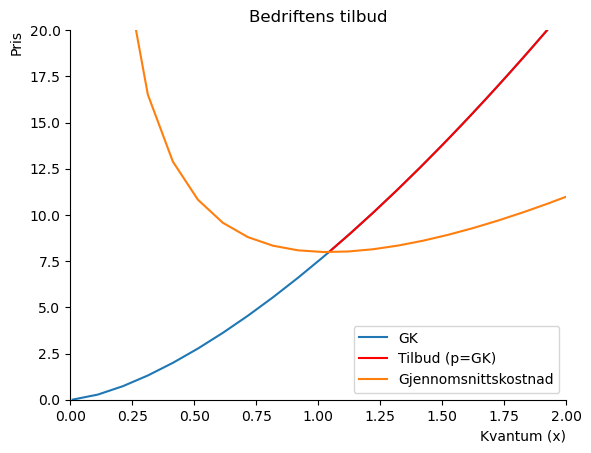

In [19]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.set_title('Bedriftens tilbud')
ax.legend(loc='best');

In [10]:
def prod_ks_(N, K):
    return N**(0.4)*K**(0.25)

N_solve = sp.solve(prod_ks_(N, K)-x, N) [0]

kostnad_1 = K*r+w*N_solve

GK_1 = sp.diff(kostnad_1, x)
AOB_1 = sp.diff(N_solve, x)
kostnad_fn_1 = sp.lambdify((x, w, r, K), kostnad_1)
GK_lamb = sp.lambdify((x, w, r, K), GK_1)

In [11]:
def AC_1(x, w, K, r):
    return kostnad_fn_1(x, w, K, r) / x

lav_x = sp.solve(AC_1(x, w, r, K) - GK_lamb(x, w, r, K), x) [2]
lav_x_lamb = sp.lambdify((w, r, K), lav_x)

display(lav_x)

0.850283000417194*K**(13/20)*r**(2/5)/w**(2/5)

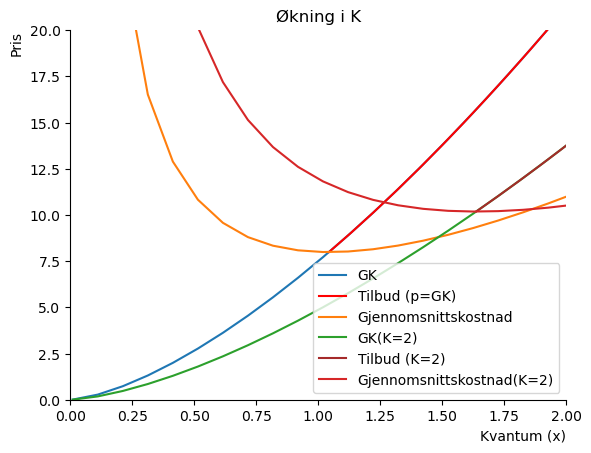

In [20]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
k_num = np.linspace(float(lav_x_lamb(3,5,2)),10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')
ax.plot(x_num, GK_lamb(x_num,3,2,2), label = 'GK(K=2)')
ax.plot(k_num, GK_lamb(k_num,3,2,2), color='brown', label = 'Tilbud (K=2)')
ax.plot(x_num, AC_1(x_num,3,5,2), label = 'Gjennomsnittskostnad(K=2)')

ax.set_title('Økning i K')
ax.legend(loc='best');

In [13]:
#økning i kapital gjør at de faste kostnadene holdes nede og tilbudet øker.

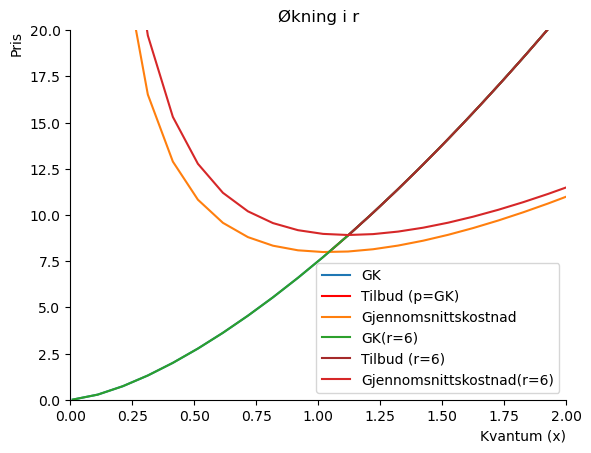

In [21]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
r_num= np.linspace(float(lav_x_lamb(3,6,1)),10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')

ax.plot(x_num, GK_lamb(x_num,3,6,1), label = 'GK(r=6)')
ax.plot(r_num, GK_lamb(r_num,3,6,1), color='brown', label = 'Tilbud (r=6)')
ax.plot(x_num, AC_1(x_num,3,6,1), label = 'Gjennomsnittskostnad(r=6)')

ax.set_title('Økning i r')
ax.legend(loc='best');

In [ ]:
#en økning i grensekostnad fører til økte priser og derfor et dårligere tilbud.

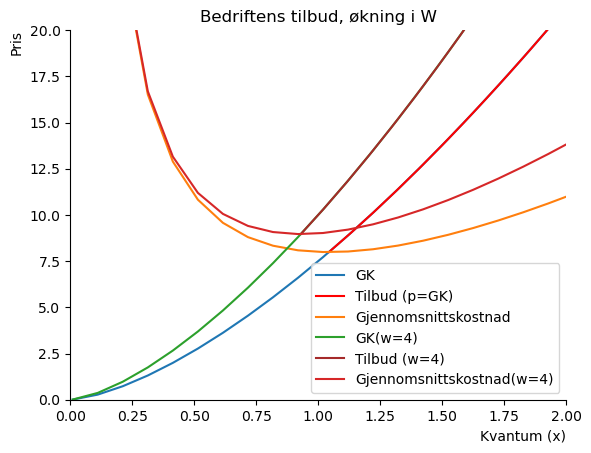

In [22]:
x_num=np.linspace(0.01,10,100)
x_1=np.linspace(float(lavest_x),10,100)
w_num= np.linspace(float(lav_x_lamb(4,5,1)),10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_num, GK_fn(x_num), label = 'GK')
ax.plot(x_1, GK_fn(x_1), color='red', label = 'Tilbud (p=GK)')
ax.plot(x_num, AC(x_num), label = 'Gjennomsnittskostnad')
                 
ax.plot(x_num, GK_lamb(x_num,4,5,1), label = 'GK(w=4)')
ax.plot(w_num, GK_lamb(w_num,4,6,1), color='brown', label = 'Tilbud (w=4)')
ax.plot(x_num, AC_1(x_num,4,5,1), label = 'Gjennomsnittskostnad(w=4)')

ax.set_title('Bedriftens tilbud, økning i W')
ax.legend(loc='best');

In [16]:
#en økning i varen arbeidskraft fører til økning i konstnadene.